In [1]:
from BMX_Classes import *
import pandas as pd
import numpy as np
import pickle 

working_directory=u"/home/tyndall/20200309_Yale_BMX_Data/"
drone_directory=u'/hirax/rf_data/bnl_202003/drone_data/drone_20200312/'

## Pull list of BMX data files:
fileslist=np.sort(glob.glob('*.data'))
idstringlist=np.sort(list(set([fn.split('_yale_')[0] for i,fn in enumerate(fileslist)])))
os.chdir(working_directory)
    
## Pull list of processed drone csv files:
os.chdir(drone_directory)
drone_list=np.sort(glob.glob('*processed.csv'))

os.chdir(working_directory)

In [2]:
#CATALOG OF ALL DRONE FLIGHTS AND CORRESPONDING" BMX FILES
file_organizer['Thursday']

[['FLY340', '200312_1434'],
 ['FLY341', nan],
 ['FLY342', '200312_1702'],
 ['FLY343', '200312_1732'],
 ['FLY344', '200312_1813'],
 ['FLY347', '200312_1944'],
 ['FLY349', '200312_2011'],
 ['FLY351', '200312_2047'],
 ['FLY352', '200312_2118'],
 ['FLY353', '200312_2152']]

In [3]:
#Class for dealing with 1 flight at a time
fly344 = Do_Everything_For_Data(drone_directory, file_organizer['Thursday'][4][0], working_directory, file_organizer['Thursday'][4][1])
fly347 = Do_Everything_For_Data(drone_directory, file_organizer['Thursday'][5][0], working_directory, file_organizer['Thursday'][5][1])


DRONE CLASS initialized -- Loading Drone RTK Data from FLY344:
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
BMX_Data CLASS initialized -- Loading Telescope Data from 200312_1813:
  Constructing time array from header mjd:
  Constructing raw autocorrelation data array (dims=[2,4,freq,time]):
DRONE CLASS initialized -- Loading Drone RTK Data from FLY347:
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
BMX_Data CLASS initialized -- Loading Telescope Data from 200312_1944:
  Constructing time array from header mjd:
  Constructing raw autocorrelation data array (dims=[2,4,freq,time]):


<Figure size 432x288 with 0 Axes>

In [4]:
#Class for dealing with two flights
#note: still need to add in mechanism for substracting out backgrounds

fly344_347 = concat_files_Do_Everything_For_Data('/hirax/rf_data/bnl_202003/drone_data/drone_20200312/', file_organizer['Thursday'][4][0], \
                                                 file_organizer['Thursday'][5][0], working_directory, file_organizer['Thursday'][4][1], file_organizer['Thursday'][5][1])


DRONE CLASS initialized -- Loading Drone RTK Data from FLY344:
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
BMX_Data CLASS initialized -- Loading Telescope Data from 200312_1813:
  Constructing time array from header mjd:
  Constructing raw autocorrelation data array (dims=[2,4,freq,time]):
BMX_Data CLASS initialized -- Loading Telescope Data from 200312_1944:
  Constructing time array from header mjd:
  Constructing raw autocorrelation data array (dims=[2,4,freq,time]):


In [5]:
#ALTERNATIVELY!
#LOAD IN PRE-PROCESSED FLIGHTS
file= '/home/erk26/BMX/BMX_dicts/thurs_raw.txt'
with open(file, 'rb') as handle:
    thurs_raw = pickle.loads(handle.read())
    
file= '/home/erk26/BMX/BMX_dicts/thurs_offsets.txt'
with open(file, 'rb') as handle:
    thurs_offsets = pickle.loads(handle.read())
    
file= '/home/erk26/BMX/BMX_dicts/wed_raw.txt'
with open(file, 'rb') as handle:
    wed_raw = pickle.loads(handle.read())

Text(0.5, 0.98, 'Full Set Thurs Flights (Raw)')

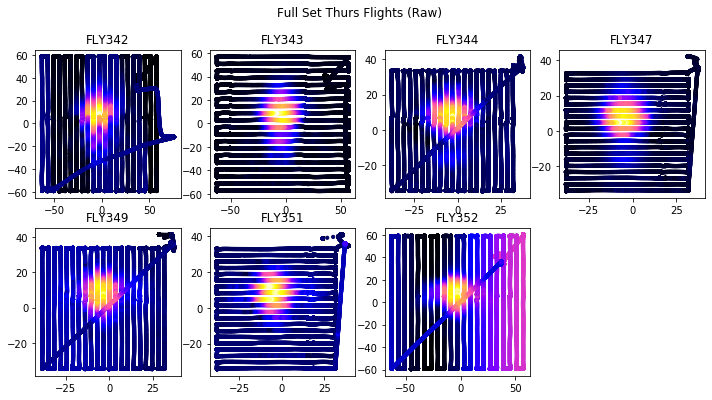

In [6]:
#PLOT ALL THURS FLIGHTS, no offsets 
fig = plt.figure(figsize = (12,6))
counter = 1
for i in thurs_raw.keys():
    ax = fig.add_subplot(2,4,counter)
    ax.scatter(thurs_raw[i].fulldict['x'], thurs_raw[i].fulldict['y'], c = (thurs_raw[i].fulldict['autos'][0,:,50]), cmap = 'gnuplot2', norm = LogNorm(), s = 10)
    ax.set_title(i)
    counter+=1
plt.suptitle('Full Set Thurs Flights (Raw)')

Text(0.5, 0.98, 'Full Set Thurs Flights (Offsets)')

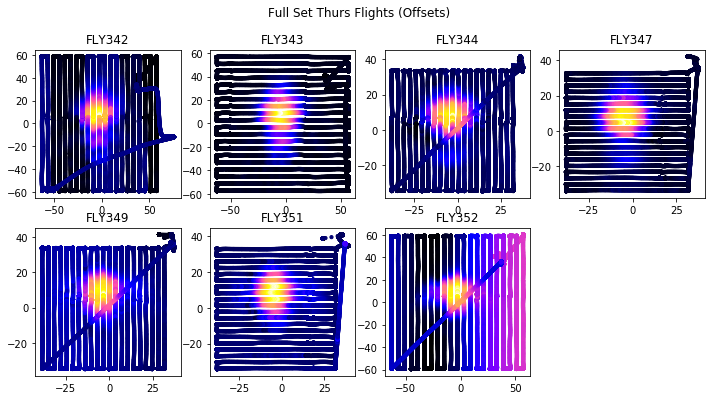

In [7]:
#PLOT ALL THURS FLIGHTS, OFFSETS 
fig = plt.figure(figsize = (12,6))
counter = 1
for i in thurs_offsets.keys():
    ax = fig.add_subplot(2,4,counter)
    ax.scatter(thurs_offsets[i].fulldict['x'], thurs_offsets[i].fulldict['y'], c = (thurs_offsets[i].fulldict['autos'][0,:,50]), cmap = 'gnuplot2', norm = LogNorm(), s = 10)
    ax.set_title(i)
    counter+=1
plt.suptitle('Full Set Thurs Flights (Offsets)')

Text(0.5, 0.98, 'Full Set Wed Flights, Pol 0')

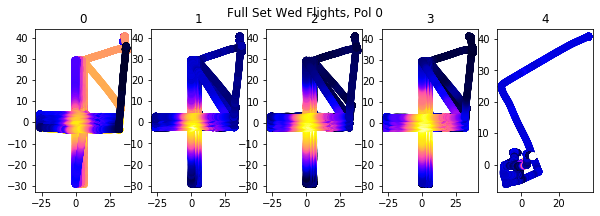

In [8]:
#PLOT ALL WED FLIGHTS (these flights were repeated in both polarizations, plotting this way does not separate that out)
fig = plt.figure(figsize = (10,3))
counter = 1
for i in wed_raw.keys():
    ax = fig.add_subplot(1,5,counter)
    ax.scatter(wed_raw[i].fulldict['x'], wed_raw[i].fulldict['y'], c = (wed_raw[i].fulldict['autos1'][1,:,50]), cmap = 'gnuplot2', norm = LogNorm())
    ax.set_title(i)
    counter+=1
plt.suptitle('Full Set Wed Flights, Pol 0')

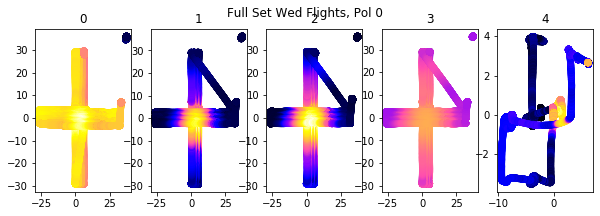

Text(0.5, 0.98, 'Full Set Wed Flights, Pol 1')

<Figure size 432x288 with 0 Axes>

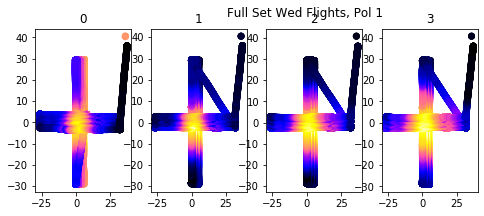

In [9]:
#PLOT ALL WED FLIGHTS, Pol 0
fig = plt.figure(figsize = (10,3))
counter = 1
for i in wed_raw.keys():
    ax = fig.add_subplot(1,5,counter)
    ax.scatter(wed_raw[i].pol0['x'], wed_raw[i].pol0['y'], c = (wed_raw[i].pol0['autos'][1,:,50]), cmap = 'gnuplot2', norm = LogNorm())
    ax.set_title(i)
    counter+=1
plt.suptitle('Full Set Wed Flights, Pol 0')
plt.show()
plt.clf()
#PLOT ALL WED FLIGHTS, Pol 1
fig = plt.figure(figsize = (10,3))
counter = 1
for i in range(4): #last flight of day was only 1 pol
    ax = fig.add_subplot(1,5,counter)
    ax.scatter(wed_raw[i].pol1['x'], wed_raw[i].pol1['y'], c = (wed_raw[i].pol1['autos'][1,:,50]), cmap = 'gnuplot2', norm = LogNorm())
    ax.set_title(i)
    counter+=1
plt.suptitle('Full Set Wed Flights, Pol 1')

# Now that we've read in data and see the catalog of flights we're working with, what can our class do/how does it function?

Class allows you to quickly generate:
- scatter plot 
- 1D cuts (both dB,lin units) in X,Y
- array of 2D gaussian fit params
- print statement of 2D fit params

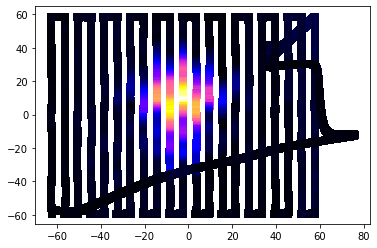

In [10]:
#scatter plot, dish 0, freq sample 100
thurs_raw['FLY342'].plotscatter(0,100)

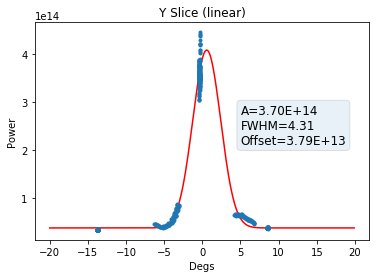

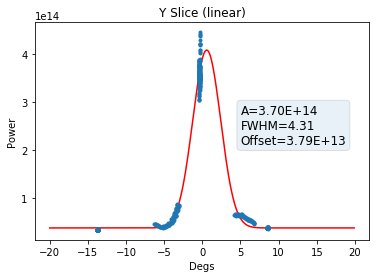

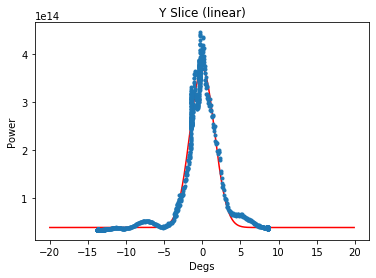

In [11]:
#Plot slices in X,Y in both linear and dB. Can choose bounds for collecting cut data in between
#(Default for cutting data is +-0.5 degrees about the beam center, determined from fits)
#Can also choose whether you want fit parameters displayed

thurs_offsets['FLY344'].plot_y_lin(0,101)
plt.show()

#Above is equivalent to:

thurs_offsets['FLY344'].plot_y_lin(0,101, lb = -0.5, ub = 0.5, params=True)
plt.show()

#for this flight, we flew more than half a degree off center,
#so adjust parameters slightly to capture full pass

thurs_offsets['FLY344'].plot_y_lin(0,101, lb = 0, ub = 1, params=False)
plt.show()

/home/erk26/BMX_git_update/BMX_Classes.py:260: RuntimeWarning: invalid value encountered in log10
  mag_=10*np.log10(np.array(mags))


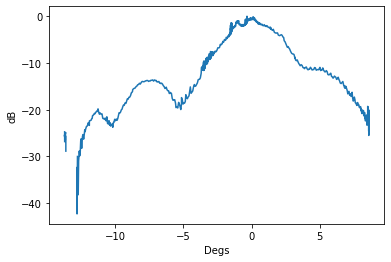

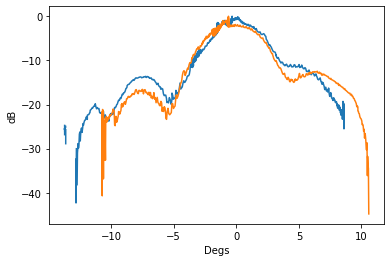

In [12]:
#Plot Cuts in dB
thurs_offsets['FLY344'].plot_y_db(0,101,0,1)
plt.show()
#You can flip profile to compare to opposite dish
#This is clearer with higher power flights
thurs_offsets['FLY344'].plot_y_db(0,101,0,1)
thurs_offsets['FLY344'].plot_y_db(2,101,0,1, flipped = True)

plt.show()


In [13]:
#other things we can do: print parameters, or get them and covariance matrix as arrays
fly344.print2Dparams(0,100)
fly344params = thurs_offsets['FLY344'].get2Dparams(0,100)

print(' ')
print('Fit Parameters = ',fly344params[0])
print('Sigmas = ',[fly344params[1][i][i] for i in range(len(fly344params[1]))])

amplitude = 3.47E+14
xo = 2.24E-02
yo = 3.31E-02
fwhm_x = 4.58E+00
fwhm_y = 3.90E+00
theta = -2.05E-04
offset = 3.49E+13
 
Fit Parameters =  [3.51136708e+14 1.96496800e-02 4.89332494e-02 1.94169343e+00
 1.64934315e+00 9.19777223e-04 3.48267303e+13]
Sigmas =  [1.209122194377932e+23, 4.847477179103429e-06, 5.369866074607535e-06, 2.9931121779610743e-06, 5.709719979891572e-06, 3.039650921776741e-05, 1.0741916969164307e+21]


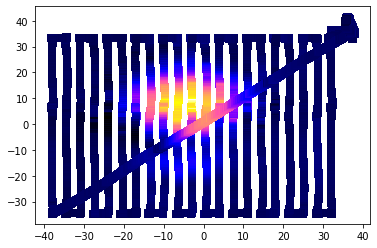

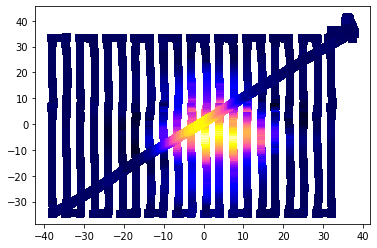

In [14]:
#generate scatter plots for different dishes
thurs_offsets['FLY344'].plotscatter(0,50)
plt.show()
thurs_offsets['FLY344'].plotscatter(1,50)


In [15]:
#For When you want to manipulate data yourself, it is stored in a dict for each flight
thurs_offsets['FLY344'].fulldict.keys()

dict_keys(['FLY', 'BMXdir', 'autos', 'drone_time', 'tel_time', 'x', 'y', 'z', 'thetaX_dish', 'thetaY_dish', 'thetaX_beam', 'thetaY_beam', 'r', 'yaw', 'phi'])

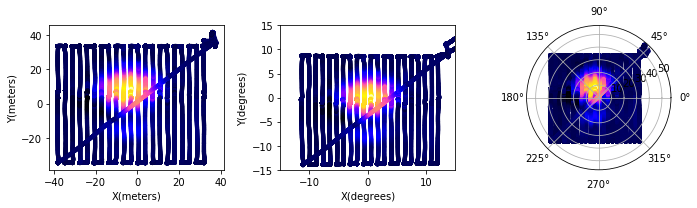

In [16]:
#You can also access all data from the dictionary, here are three example scatter plots for dish 0

fig = plt.figure(figsize = (10,3))
ax = fig.add_subplot(1,3,1)
ax.scatter(thurs_offsets['FLY344'].fulldict['x'], thurs_offsets['FLY344'].fulldict['y'], c = (thurs_offsets['FLY344'].fulldict['autos'][0,:,50]), cmap = 'gnuplot2', s = 10, norm = LogNorm())
ax.set_xlabel('X(meters)')
ax.set_ylabel('Y(meters)')

ax = fig.add_subplot(1,3,2)
ax.scatter(np.degrees(thurs_offsets['FLY344'].fulldict['thetaX_beam'][0]), np.degrees(thurs_offsets['FLY344'].fulldict['thetaY_beam'][0]), c = (thurs_offsets['FLY344'].fulldict['autos'][0,:,50]), cmap = 'gnuplot2', s = 10, norm = LogNorm())
ax.set_xlabel('X(degrees)')
ax.set_ylabel('Y(degrees)')
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)

ax = fig.add_subplot(1,3,3, projection = 'polar')
ax.scatter(thurs_offsets['FLY344'].fulldict['phi'], thurs_offsets['FLY344'].fulldict['r'], c = (thurs_offsets['FLY344'].fulldict['autos'][0,:,50]), cmap = 'gnuplot2', s = 10, norm = LogNorm())
plt.tight_layout()


Text(0.5, 0, 'Freq Index')

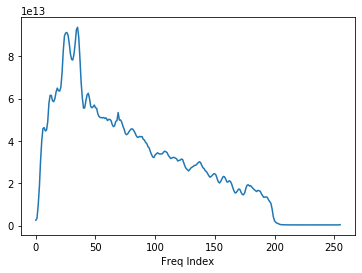

In [17]:
#To plot a spectrum for dish 0 at time sample 100:
plt.plot(thurs_offsets['FLY344'].fulldict['autos'][0,100,:])
plt.xlabel('Freq Index')

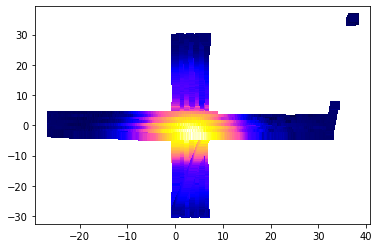

In [18]:
#pol 0; dish 1; freq sample 100
wed_raw[0].plotscatter(0,1,100)

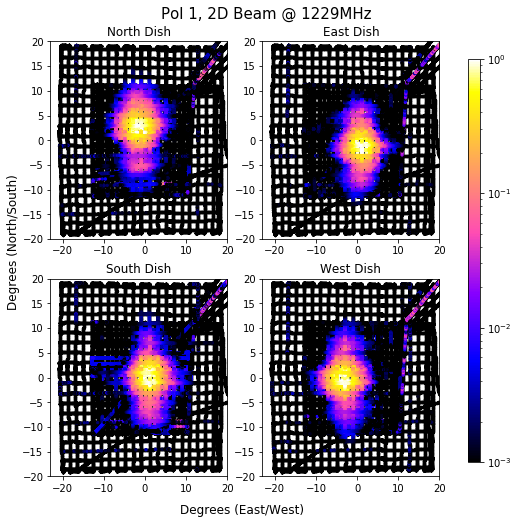

In [19]:
### Uncalibrated, normalized, beam maps roughly stitched togethe
fig = plt.figure(figsize = (8,8))
counter = 1

titles = ['North Dish', 'East Dish', 'South Dish', 'West Dish']

vminn = 0.001
vmaxx = 1

freq = 60

for dish in range(4):
    ax = fig.add_subplot(2,2,counter)
    for key in ['FLY344', 'FLY347', 'FLY342', 'FLY343']:
        x = np.degrees(np.arctan(thurs_offsets[key].fulldict['x']/thurs_offsets[key].fulldict['z']))
        y = np.degrees(np.arctan(thurs_offsets[key].fulldict['y']/thurs_offsets[key].fulldict['z']))
        ax.scatter(x, y,color = 'black', marker = '.', s=20)

    for key in ['FLY344', 'FLY347', 'FLY342', 'FLY343']:
        x = np.degrees(np.arctan(thurs_offsets[key].fulldict['x']/thurs_offsets[key].fulldict['z']))
        y = np.degrees(np.arctan(thurs_offsets[key].fulldict['y']/thurs_offsets[key].fulldict['z']))
        power = (np.array((thurs_offsets[key].fulldict['autos'][dish,:,freq]-thurs_offsets[key].get2Dparams(dish,freq)[0][-1])/(thurs_offsets[key].get2Dparams(dish,freq)[0][0]-thurs_offsets[key].get2Dparams(dish,freq)[0][-1])))
        cm = ax.scatter(x,y,c = power, cmap = 'gnuplot2', vmin = vminn, vmax = vmaxx, norm = LogNorm(), marker = '.', s=20)
    
    ax.set_title(titles[dish])
    ax.set_xlim(-23,20)
    ax.set_ylim(-20,20)


    counter +=1

    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(cm, cax=cbar_ax) 
fig.text(0.35, 0.06, 'Degrees (East/West)', fontsize = 12)
fig.text(0.05, 0.42, 'Degrees (North/South)', rotation='vertical', fontsize = 12)

plt.suptitle('Pol 1, 2D Beam @ '+str(round(getfreq(freq)))+'MHz', y=0.94, fontsize = 15)
plt.show()

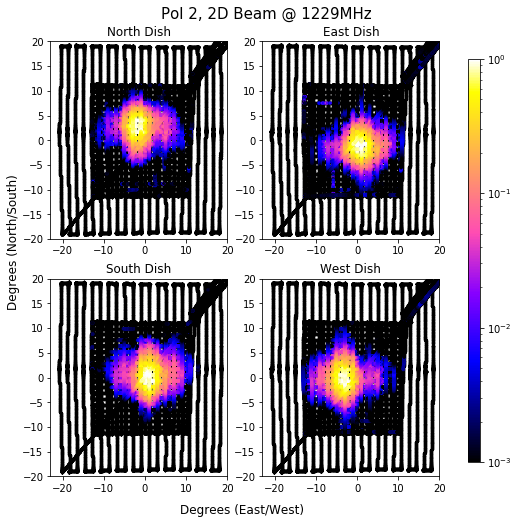

In [20]:
fig = plt.figure(figsize = (8,8))
counter = 1

titles = ['North Dish', 'East Dish', 'South Dish', 'West Dish']

vminn = 0.001
vmaxx = 1

freq = 60

for dish in range(4):
    ax = fig.add_subplot(2,2,counter)
    for key in ['FLY349', 'FLY351', 'FLY352']:
        x = np.degrees(np.arctan(thurs_offsets[key].fulldict['x']/thurs_offsets[key].fulldict['z']))
        y = np.degrees(np.arctan(thurs_offsets[key].fulldict['y']/thurs_offsets[key].fulldict['z']))
        ax.scatter(x, y,color = 'black', marker = '.', s=20)

    for key in ['FLY349', 'FLY351', 'FLY352']:
        x = np.degrees(np.arctan(thurs_offsets[key].fulldict['x']/thurs_offsets[key].fulldict['z']))
        y = np.degrees(np.arctan(thurs_offsets[key].fulldict['y']/thurs_offsets[key].fulldict['z']))
        power = (np.array((thurs_offsets[key].fulldict['autos'][dish,:,freq]-thurs_offsets[key].get2Dparams(dish,freq)[0][-1])/(thurs_offsets[key].get2Dparams(dish,freq)[0][0]-thurs_offsets[key].get2Dparams(dish,freq)[0][-1])))
        cm = ax.scatter(x,y,c = power, cmap = 'gnuplot2', vmin = vminn, vmax = vmaxx, norm = LogNorm(), marker = '.', s=20)
    
    ax.set_title(titles[dish])
    ax.set_xlim(-23,20)
    ax.set_ylim(-20,20)


    counter +=1

    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(cm, cax=cbar_ax) 
fig.text(0.35, 0.06, 'Degrees (East/West)', fontsize = 12)
fig.text(0.05, 0.42, 'Degrees (North/South)', rotation='vertical', fontsize = 12)

plt.suptitle('Pol 2, 2D Beam @ '+str(round(getfreq(freq)))+'MHz', y=0.94, fontsize = 15)
plt.show()

# Other Random Plots

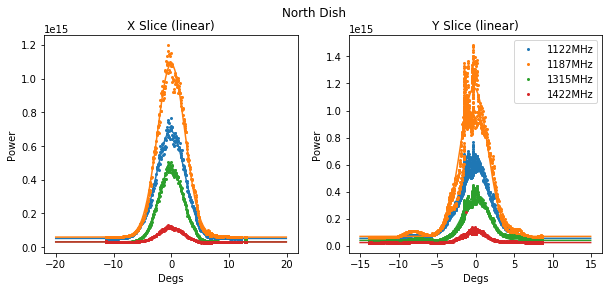

Text(0.5, 0.98, 'East Dish')

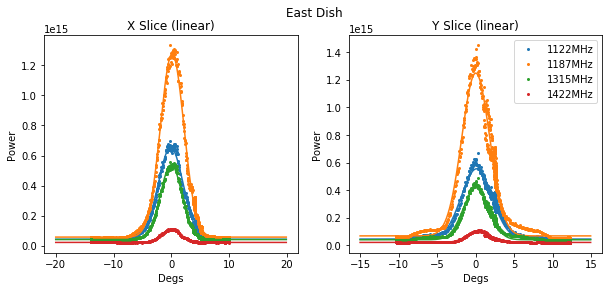

In [21]:
dishindx = 0
lb = -0.8
ub = 0.8

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,2,2)
for freqindx in [10, 40, 100, 150]:
    x = list(np.degrees(thurs_offsets['FLY344'].fulldict['thetaX_beam'][dishindx]))
    y = list(np.degrees(thurs_offsets['FLY344'].fulldict['thetaY_beam'][dishindx]))
    z = list(thurs_offsets['FLY344'].fulldict['autos'][dishindx][:,freqindx])

    y_slice = [y[i] for i in range(len(x)) if lb<x[i]<ub]
    power_y_slice=[z[i] for i in range(len(x)) if lb<x[i]<ub]

    popt, pcov = opt.curve_fit(gauss1D, y_slice, power_y_slice, p0=[1e15, 0, 3, 1e12])
    angs_forfit = np.arange(-15,15,0.1)
    gauss_fit = gauss1D(angs_forfit, *popt)
    color=next(ax._get_lines.prop_cycler)['color']
    ax.plot(angs_forfit, gauss_fit, color=color)
    ax.plot(y_slice, power_y_slice, '.', markersize=4, color=color, label = str(round(getfreq(freqindx)))+'MHz')
    ax.legend()

    ax.set_xlabel('Degs')
    ax.set_ylabel('Power')
    ax.set_title('Y Slice (linear)')
    
ax = fig.add_subplot(1,2,1)
for freqindx in [10, 40, 100, 150]:
    x = list(np.degrees(thurs_offsets['FLY347'].fulldict['thetaX_beam'][dishindx]))
    y = list(np.degrees(thurs_offsets['FLY347'].fulldict['thetaY_beam'][dishindx]))
    z = list(thurs_offsets['FLY347'].fulldict['autos'][dishindx][:,freqindx])

    x_slice = [x[i] for i in range(len(x)) if lb<y[i]<ub]
    power_x_slice=[z[i] for i in range(len(x)) if lb<y[i]<ub]  
    
    
    popt, pcov = opt.curve_fit(gauss1D, x_slice, power_x_slice, p0=[1e15, 0, 3, 1e12])
    angs_forfit = np.arange(-20,20,0.1)
    gauss_fit = gauss1D(angs_forfit, *popt)
    color=next(ax._get_lines.prop_cycler)['color']

    ax.plot(angs_forfit, gauss_fit, color=color)
    ax.plot(x_slice, power_x_slice, '.', markersize=4, color=color, label = str(round(getfreq(freqindx)))+'MHz')

    ax.set_xlabel('Degs')
    ax.set_ylabel('Power')
    ax.set_title('X Slice (linear)')
plt.suptitle('North Dish')

plt.show()



dishindx = 1
lb = -1.5
ub = 0


fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,2,2)
for freqindx in [10, 40, 100, 150]:
    x = list(np.degrees(thurs_offsets['FLY344'].fulldict['thetaX_beam'][dishindx]))
    y = list(np.degrees(thurs_offsets['FLY344'].fulldict['thetaY_beam'][dishindx]))
    z = list(thurs_offsets['FLY344'].fulldict['autos'][dishindx][:,freqindx])

    y_slice = [y[i] for i in range(len(x)) if lb<x[i]<ub]
    power_y_slice=[z[i] for i in range(len(x)) if lb<x[i]<ub]

    popt, pcov = opt.curve_fit(gauss1D, y_slice, power_y_slice, p0=[1e15, 0, 3, 1e12])
    angs_forfit = np.arange(-15,15,0.1)
    gauss_fit = gauss1D(angs_forfit, *popt)
    color=next(ax._get_lines.prop_cycler)['color']
    ax.plot(angs_forfit, gauss_fit, color=color)
    ax.plot(y_slice, power_y_slice, '.', markersize=4, color=color, label = str(round(getfreq(freqindx)))+'MHz')
    ax.legend()

    ax.set_xlabel('Degs')
    ax.set_ylabel('Power')
    ax.set_title('Y Slice (linear)')
    
ax = fig.add_subplot(1,2,1)
for freqindx in [10, 40, 100, 150]:
    x = list(np.degrees(thurs_offsets['FLY347'].fulldict['thetaX_beam'][dishindx]))
    y = list(np.degrees(thurs_offsets['FLY347'].fulldict['thetaY_beam'][dishindx]))
    z = list(thurs_offsets['FLY347'].fulldict['autos'][dishindx][:,freqindx])

    x_slice = [x[i] for i in range(len(x)) if lb<y[i]<ub]
    power_x_slice=[z[i] for i in range(len(x)) if lb<y[i]<ub]  
    
    
    popt, pcov = opt.curve_fit(gauss1D, x_slice, power_x_slice, p0=[1e15, 0, 3, 1e12])
    angs_forfit = np.arange(-20,20,0.1)
    gauss_fit = gauss1D(angs_forfit, *popt)
    color=next(ax._get_lines.prop_cycler)['color']

    ax.plot(angs_forfit, gauss_fit, color=color)
    ax.plot(x_slice, power_x_slice, '.', markersize=4, color=color, label = str(round(getfreq(freqindx)))+'MHz')

    ax.set_xlabel('Degs')
    ax.set_ylabel('Power')
    ax.set_title('X Slice (linear)')
plt.suptitle('East Dish')


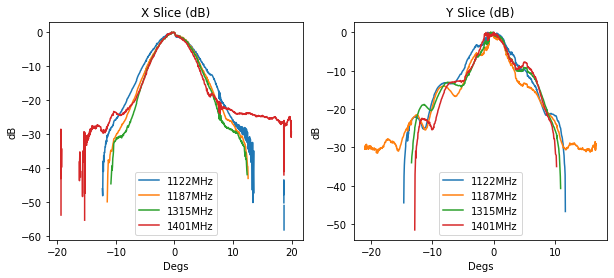

In [22]:
dishindx = 0
lb = -1
ub = 1

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,2,1)
for freqindx in [10, 40, 100, 140]:
    x = list(np.degrees(thurs_offsets['FLY343'].fulldict['thetaX_beam'][dishindx]))
    y = list(np.degrees(thurs_offsets['FLY343'].fulldict['thetaY_beam'][dishindx]))
    z = list(thurs_offsets['FLY343'].fulldict['autos'][dishindx][:,freqindx])


    initial_guess = (1e15, 0, 0, 5, 5, 0, 1e12)
    popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), z, p0=initial_guess)

    x_slice = [x[i] for i in range(len(x)) if lb<y[i]<ub]
    power_x_slice=[z[i]-popt[-1] for i in range(len(x)) if lb<y[i]<ub]  

    zipped = list(zip(x_slice,power_x_slice))
    zipped.sort()
    x_slice, power_x_slice = list(zip(*zipped))

    ax.plot(np.array(x_slice), lintodb(power_x_slice/np.max(power_x_slice)), label = str(round(getfreq(freqindx)))+'MHz')

    ax.set_xlabel('Degs')
    ax.set_ylabel('dB')
    ax.legend()
    ax.set_title('X Slice (dB)')

ax = fig.add_subplot(1,2,2)

for freqindx in [10, 40, 100, 140]:
    x = list(np.degrees(thurs_offsets['FLY342'].fulldict['thetaX_beam'][dishindx]))
    y = list(np.degrees(thurs_offsets['FLY342'].fulldict['thetaY_beam'][dishindx]))
    z = list(thurs_offsets['FLY342'].fulldict['autos'][dishindx][:,freqindx])

    initial_guess = (1e15, 0, 0, 5, 5, 0, 1e12)
    popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), z, p0=initial_guess)
    
    y_slice = [y[i] for i in range(len(x)) if lb<x[i]<ub]
    power_y_slice=[z[i]-popt[-1] for i in range(len(x)) if lb<x[i]<ub]

    zipped = list(zip(y_slice,power_y_slice))
    zipped.sort()
    y_slice, power_y_slice = list(zip(*zipped))

    ax.plot(np.array(y_slice), lintodb(power_y_slice/np.max(power_y_slice)), label = str(round(getfreq(freqindx)))+'MHz')

    ax.set_xlabel('Degs')
    ax.set_ylabel('dB')
    ax.legend()
    ax.set_title('Y Slice (dB)')


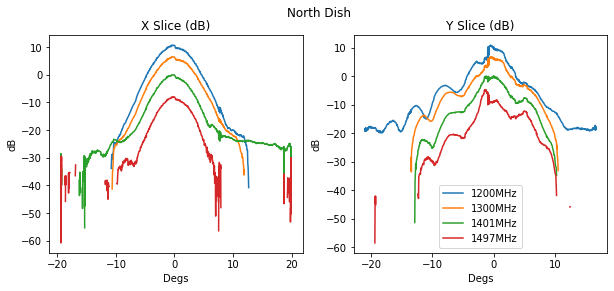

Text(0.5, 0.98, 'East Dish')

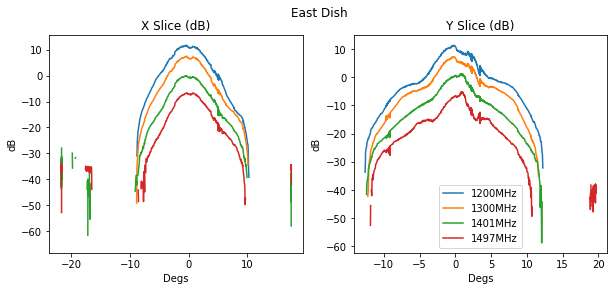

In [23]:
dishindx = 0
lb = -1
ub = 1

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,2,1)
for freqindx in [46, 93, 140, 185]:
    x = list(np.degrees(thurs_offsets['FLY343'].fulldict['thetaX_beam'][dishindx]))
    y = list(np.degrees(thurs_offsets['FLY343'].fulldict['thetaY_beam'][dishindx]))
    z = list(thurs_offsets['FLY343'].fulldict['autos'][dishindx][:,freqindx])


    initial_guess = (1e15, 0, 0, 5, 5, 0, 1e12)
    popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), z, p0=initial_guess)

    x_slice = [x[i] for i in range(len(x)) if lb<y[i]<ub]
    power_x_slice=[z[i]-popt[-1] for i in range(len(x)) if lb<y[i]<ub]  

    zipped = list(zip(x_slice,power_x_slice))
    zipped.sort()
    x_slice, power_x_slice = list(zip(*zipped))

    ax.plot(np.array(x_slice), lintodb(np.array(power_x_slice)/1610376037692477), label = str(round(getfreq(freqindx)))+'MHz')

    ax.set_xlabel('Degs')
    ax.set_ylabel('dB')
#     ax.legend()
    ax.set_title('X Slice (dB)')

ax = fig.add_subplot(1,2,2)

for freqindx in [46, 93, 140, 185]:
    x = list(np.degrees(thurs_offsets['FLY342'].fulldict['thetaX_beam'][dishindx]))
    y = list(np.degrees(thurs_offsets['FLY342'].fulldict['thetaY_beam'][dishindx]))
    z = list(thurs_offsets['FLY342'].fulldict['autos'][dishindx][:,freqindx])

    initial_guess = (1e15, 0, 0, 5, 5, 0, 1e12)
    popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), z, p0=initial_guess)
    
    y_slice = [y[i] for i in range(len(x)) if lb<x[i]<ub]
    power_y_slice=[z[i]-popt[-1] for i in range(len(x)) if lb<x[i]<ub]

    zipped = list(zip(y_slice,power_y_slice))
    zipped.sort()
    y_slice, power_y_slice = list(zip(*zipped))

    ax.plot(np.array(y_slice), lintodb(np.array(power_y_slice)/1610376037692477), label = str(round(getfreq(freqindx)))+'MHz')

    ax.set_xlabel('Degs')
    ax.set_ylabel('dB')
    ax.legend()
    ax.set_title('Y Slice (dB)')
plt.suptitle('North Dish')

plt.show()


dishindx = 1
lb = -1
ub = 1

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,2,1)
for freqindx in [46, 93, 140, 185]:
    x = list(np.degrees(thurs_offsets['FLY343'].fulldict['thetaX_beam'][dishindx]))
    y = list(np.degrees(thurs_offsets['FLY343'].fulldict['thetaY_beam'][dishindx]))
    z = list(thurs_offsets['FLY343'].fulldict['autos'][dishindx][:,freqindx])


    initial_guess = (1e15, 0, 0, 5, 5, 0, 1e12)
    popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), z, p0=initial_guess)

    x_slice = [x[i] for i in range(len(x)) if lb<y[i]<ub]
    power_x_slice=[z[i]-popt[-1] for i in range(len(x)) if lb<y[i]<ub]  

    zipped = list(zip(x_slice,power_x_slice))
    zipped.sort()
    x_slice, power_x_slice = list(zip(*zipped))

    ax.plot(np.array(x_slice), lintodb(np.array(power_x_slice)/1610376037692477), label = str(round(getfreq(freqindx)))+'MHz')

    ax.set_xlabel('Degs')
    ax.set_ylabel('dB')
#     ax.legend()
    ax.set_title('X Slice (dB)')

ax = fig.add_subplot(1,2,2)

for freqindx in [46, 93, 140, 185]:
    x = list(np.degrees(thurs_offsets['FLY342'].fulldict['thetaX_beam'][dishindx]))
    y = list(np.degrees(thurs_offsets['FLY342'].fulldict['thetaY_beam'][dishindx]))
    z = list(thurs_offsets['FLY342'].fulldict['autos'][dishindx][:,freqindx])

    initial_guess = (1e15, 0, 0, 5, 5, 0, 1e12)
    popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), z, p0=initial_guess)
    
    y_slice = [y[i] for i in range(len(x)) if lb<x[i]<ub]
    power_y_slice=[z[i]-popt[-1] for i in range(len(x)) if lb<x[i]<ub]

    zipped = list(zip(y_slice,power_y_slice))
    zipped.sort()
    y_slice, power_y_slice = list(zip(*zipped))

    ax.plot(np.array(y_slice), lintodb(np.array(power_y_slice)/1610376037692477), label = str(round(getfreq(freqindx)))+'MHz')

    ax.set_xlabel('Degs')
    ax.set_ylabel('dB')
    ax.legend()
    ax.set_title('Y Slice (dB)')
plt.suptitle('East Dish')



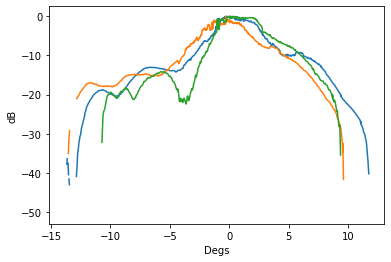

In [24]:
#plot cuts from successive passes (sidelobes!)
thurs_raw['FLY342'].plot_y_db(0,100, lb = -1, ub = 1)
thurs_raw['FLY342'].plot_y_db(0,100, lb = 1, ub = 3)
thurs_raw['FLY342'].plot_y_db(0,100, lb = 3, ub = 5)

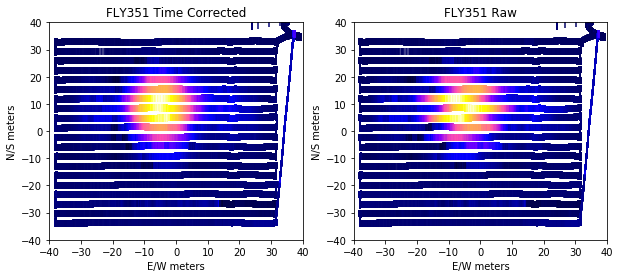

In [25]:
#Time Correction Illustration

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,2,1)
ax.scatter(thurs_offsets['FLY351'].fulldict['x'],\
            thurs_offsets['FLY351'].fulldict['y'], s=50,\
#             c=(np.array(power3[lb:ub])-np.min(power3[lb:ub])),\
            c=(thurs_offsets['FLY351'].fulldict['autos'][0,:,50]),\
            cmap='gnuplot2',norm=LogNorm(), marker = '|')
ax.set_xlim(-40,40)
ax.set_ylim(-40,40)
ax.set_xlabel('E/W meters')
ax.set_ylabel('N/S meters')
ax.set_title('FLY351 Time Corrected')

ax = fig.add_subplot(1,2,2)
ax.scatter(thurs_raw['FLY351'].fulldict['x'],\
            thurs_raw['FLY351'].fulldict['y'], s=50,\
#             c=(np.array(power3[lb:ub])-np.min(power3[lb:ub])),\
            c=(thurs_raw['FLY351'].fulldict['autos'][0,:,50]),\
            cmap='gnuplot2',norm=LogNorm(), marker = '|')
ax.set_xlim(-40,40)
ax.set_ylim(-40,40)
ax.set_xlabel('E/W meters')
ax.set_ylabel('N/S meters')
ax.set_title('FLY351 Raw')

plt.show()

In [26]:
beamCenters = np.array(([-4.670897458296071, 7.777616712345406],\
[3.3385316030884016, -3.27205823116637],\
[3.2569049644387906, 1.2983814825634061],\
[-10.421877726648322, -0.7263793693162363]))

dishLocations = np.array(([[-3.7605200906121437, 3.865245048570655],\
[-0.0641296465130804, 0.035901010584928825], \
[-3.6868008232255924, -3.205432553991354], \
[-7.485557261347768, -0.07592779975602093]]))

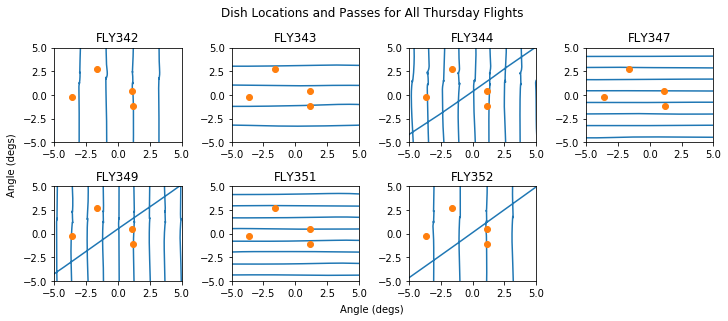

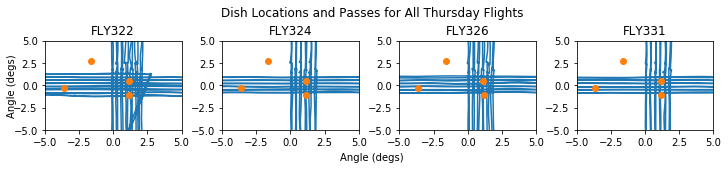

In [27]:
fig = plt.figure(figsize= (10,4))
counter = 1
for i in thurs_offsets.keys():
    ax = fig.add_subplot(2,4,counter)
    ax.plot(np.degrees(np.tan(thurs_offsets[i].fulldict['x']/165)), np.degrees(np.tan(thurs_offsets[i].fulldict['y']/165)))
    ax.plot(np.degrees(np.tan(beamCenters[:,0]/165)), np.degrees(np.tan(beamCenters[:,1]/165)), 'o')
    ax.set_title(i)
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)

    counter +=1
plt.suptitle('Dish Locations and Passes for All Thursday Flights', y=1.05)
fig.text(0.5, 0, 'Angle (degs)', ha='center', va='center')
fig.text(0, 0.5, 'Angle (degs)', ha='center', va='center', rotation='vertical')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize= (10,2))
counter = 1
for i in list(wed_raw.keys())[:-1]:
    ax = fig.add_subplot(1,4,counter)
    ax.plot(np.degrees(np.tan(wed_raw[i].fulldict['x']/165)), np.degrees(np.tan(wed_raw[i].fulldict['y']/165)))
    ax.plot(np.degrees(np.tan(beamCenters[:,0]/165)), np.degrees(np.tan(beamCenters[:,1]/165)), 'o')
    ax.set_title(wed_raw[i].fulldict['FLY'])
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)

    counter +=1
plt.suptitle('Dish Locations and Passes for All Thursday Flights', y=1.05)
fig.text(0.5, 0, 'Angle (degs)', ha='center', va='center')
fig.text(0, 0.5, 'Angle (degs)', ha='center', va='center', rotation='vertical')
plt.tight_layout()

(0, 80)

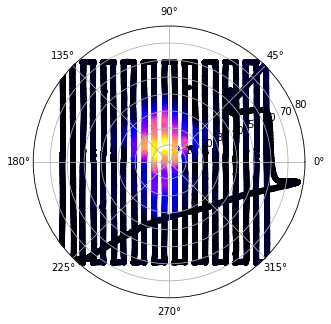

In [28]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1, projection = 'polar')
r, theta = thurs_offsets['FLY342'].fulldict['r'], thurs_offsets['FLY342'].fulldict['phi']

ax.scatter(theta,r, c=thurs_offsets['FLY342'].fulldict['autos'][0][:,100], cmap='gnuplot2', norm=LogNorm(), s=20)
ax.set_ylim(0,80)

(0, 80)

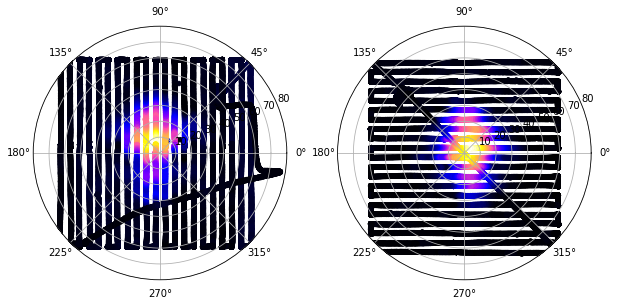

In [29]:
#start to compare shape of N dish Pol 0 (rotated 90 degs) and East dish Pol 1 
#in both, dish should be oriented the same direction wrt feed/polarization 

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,2,1, projection = 'polar')
r, theta = thurs_offsets['FLY342'].fulldict['r'], thurs_offsets['FLY342'].fulldict['phi']
power = thurs_offsets['FLY342'].fulldict['autos'][0][:,100]
ax.scatter(theta,r, c=power, cmap='gnuplot2', norm=LogNorm(), s=20)
ax.set_ylim(0,80)

ax = fig.add_subplot(1,2,2, projection = 'polar')
r, theta = thurs_offsets['FLY352'].fulldict['r'], thurs_offsets['FLY352'].fulldict['phi']
power = thurs_offsets['FLY352'].fulldict['autos'][1][:,100]
ax.scatter(theta+np.pi/2,r, c=power, cmap='gnuplot2', norm=LogNorm(), s=20)
ax.set_ylim(0,80)


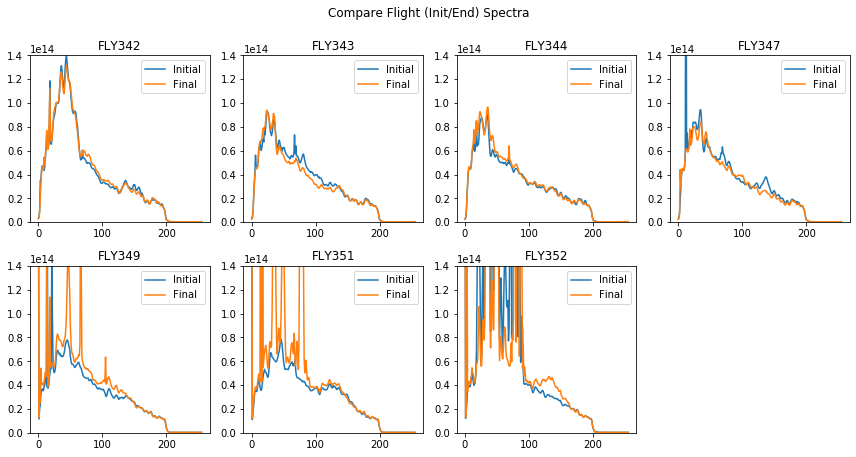

In [30]:
fig = plt.figure(figsize = (12,6))
counter = 1
for i in thurs_raw.keys():
    ax = fig.add_subplot(2,4,counter)
    ax.plot(thurs_offsets[i].fulldict['autos'][0,0,:], label = 'Initial')
    ax.plot(thurs_offsets[i].fulldict['autos'][0,len(thurs_offsets[i].fulldict['autos'][0,:,0])-1,:], label = 'Final')
    ax.set_ylim(0,1.4e14)
    ax.set_title(i)
    counter +=1
    ax.legend()
plt.suptitle('Compare Flight (Init/End) Spectra', y=1.05)
plt.tight_layout()

## Some Info From Fits

In [31]:
def sigma_tofwhm(x_sigma):
    x_fwhm = 2.355*x_sigma
    return(x_fwhm)

In [32]:
file= '/home/erk26/BMX/BMX_dicts/gaussianfits.txt'
with open(file, 'rb') as handle:
    gauss_fits = pickle.loads(handle.read())

Text(0.5, 1.0, 'Beam Centroid Locations, all fits')

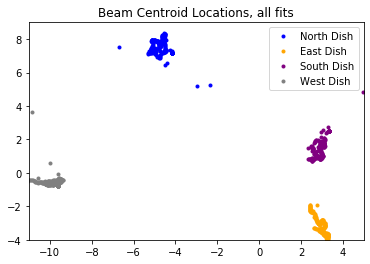

In [33]:
#these were fit wrt beam center and in degrees, 
#to plot centroids together I turned degrees back to meters and subtracted off beam center locations
#(is this ok? ...should be reasonable enough approx....)

#WANT TO REPEAT THIS FOR GRID FLIGHTS

colorlist = ['blue', 'orange', 'purple', 'gray']
dishlist = ['North', 'East', 'South', 'West']

def degs_to_dist(degrees):
    meters = 165*np.tan(degrees*np.pi/180)
    return(meters)

for dish in range(4):
    for i in range(len(gauss_fits['FLY342'][0])):
        try: 
            if i == 1: plt.plot(degs_to_dist(gauss_fits['FLY342'][dish][i][0][1])+beamCenters[dish][0], degs_to_dist(gauss_fits['FLY342'][dish][i][0][2])+beamCenters[dish][1],'.', label = dishlist[dish]+' Dish', color = colorlist[dish])
            if i != 1: plt.plot(degs_to_dist(gauss_fits['FLY342'][dish][i][0][1])+beamCenters[dish][0], degs_to_dist(gauss_fits['FLY342'][dish][i][0][2])+beamCenters[dish][1],'.', color = colorlist[dish])

        except: pass
plt.ylim(-4,9)
plt.xlim(-11,5)
plt.legend()
plt.title('Beam Centroid Locations, all fits')

In [34]:
#want to look at fits from full coverage, file we read in above was flight by flight, so dont have full grid

file= '/home/erk26/BMX/BMX_dicts/concat_flights.txt'
with open(file, 'rb') as handle:
    concatFlights = pickle.loads(handle.read())

In [35]:
file= '/home/erk26/BMX/BMX_dicts/gaussianfits_concat.txt'
with open(file, 'rb') as handle:
    concatFits = pickle.loads(handle.read())

Text(0.5, 1.05, 'Centroid Locations, Fits at All Freqs')

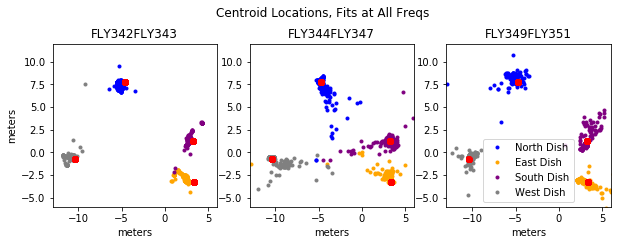

In [36]:
colorlist = ['blue', 'orange', 'purple', 'gray']
dishlist = ['North', 'East', 'South', 'West']

def degs_to_dist(degrees):
    meters = 165*np.tan(degrees*np.pi/180)
    return(meters)
key = 'FLY342FLY343'
counter = 1
fig = plt.figure(figsize = (10,3))

for key in concatFits.keys():
    ax = fig.add_subplot(1,3,counter)
    for dish in range(4):
        for i in range(len(concatFits[key][0])):
            try: 
                if i == 1: 
                    ax.plot(degs_to_dist(concatFits[key][dish][i][0][1])+beamCenters[dish][0], degs_to_dist(concatFits[key][dish][i][0][2])+beamCenters[dish][1],'.', label = dishlist[dish]+' Dish', color = colorlist[dish])

                if i != 1: 
                    ax.plot(degs_to_dist(concatFits[key][dish][i][0][1])+beamCenters[dish][0], degs_to_dist(concatFits[key][dish][i][0][2])+beamCenters[dish][1],'.', color = colorlist[dish])
                    ax.plot(beamCenters[:,0], beamCenters[:,1], 'ro')

            except: pass
    ax.set_ylim(-6,12)
    ax.set_xlim(-13,6)
    ax.set_xlabel('meters')
    if counter == 1: ax.set_ylabel('meters')
    ax.set_title(key)
    counter +=1
ax.legend()

plt.suptitle('Centroid Locations, Fits at All Freqs', y=1.05)

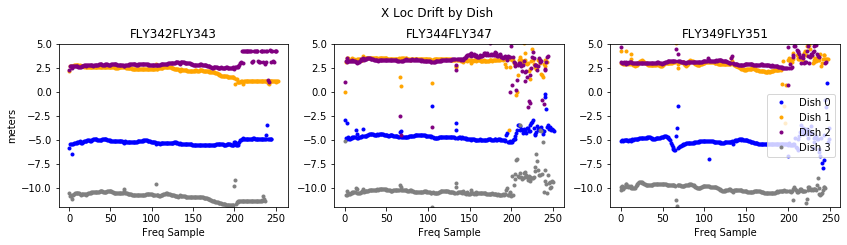

Text(0.5, 1.05, 'Y Loc Drift by Dish')

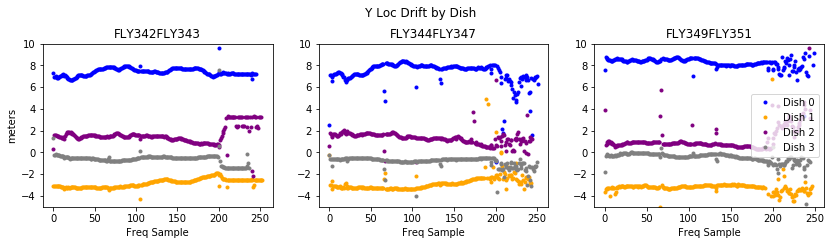

In [37]:
#check how coordinates drift (or dont) in frequency

colorlist = ['blue', 'orange', 'purple', 'gray']

counter = 1
fig = plt.figure(figsize = (14,3))

for key in concatFits.keys():
    ax = fig.add_subplot(1,3,counter)
    for dish in range(4):
        coord = []
        for i in range(len(concatFits[key][dish])):
            try: coord.append(degs_to_dist(concatFits[key][dish][i][0][1])+beamCenters[dish][0])
            except: pass 
        ax.plot(range(len(coord)), coord,'.', label ='Dish '+str(dish), color = colorlist[dish])

#         if i != 1: 
#             ax.plot(range(len(fwhmx)), fwhmx,'.', color = colorlist[dish])

    ax.set_ylim(-12,5)
    ax.set_xlabel('Freq Sample')
    if counter == 1: ax.set_ylabel('meters')
    ax.set_title(key)
    counter +=1
ax.legend()
plt.suptitle('X Loc Drift by Dish', y=1.05)
plt.show()

#how are coordinates drifting in frequency?

colorlist = ['blue', 'orange', 'purple', 'gray']

counter = 1
fig = plt.figure(figsize = (14,3))

for key in concatFits.keys():
    ax = fig.add_subplot(1,3,counter)
    for dish in range(4):
        coord = []
        for i in range(len(concatFits[key][dish])):
            try: coord.append(degs_to_dist(concatFits[key][dish][i][0][2])+beamCenters[dish][1])
            except: pass 
        ax.plot(range(len(coord)), coord,'.', label ='Dish '+str(dish), color = colorlist[dish])

#         if i != 1: 
#             ax.plot(range(len(fwhmx)), fwhmx,'.', color = colorlist[dish])

    ax.set_ylim(-5,10)
    ax.set_xlabel('Freq Sample')
    if counter == 1: ax.set_ylabel('meters')
    ax.set_title(key)
    counter +=1
ax.legend()
plt.suptitle('Y Loc Drift by Dish', y=1.05)



Text(0, 0.5, 'meters')

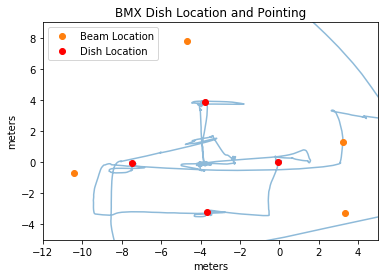

In [38]:
plt.plot(wed_raw[4].fulldict['x'], wed_raw[4].fulldict['y'], alpha = 0.5)
plt.plot(beamCenters[:,0], beamCenters[:,1], 'o', label = 'Beam Location')
plt.plot(dishLocations[:,0], dishLocations[:,1], 'ro', label = 'Dish Location')

plt.xlim(-12,5)
plt.ylim(-5,9)
plt.legend()
plt.title('BMX Dish Location and Pointing')
plt.xlabel('meters')
plt.ylabel('meters')

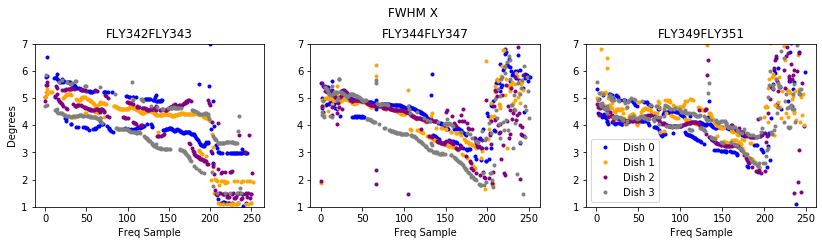

Text(0.5, 1.05, 'FWHM Y')

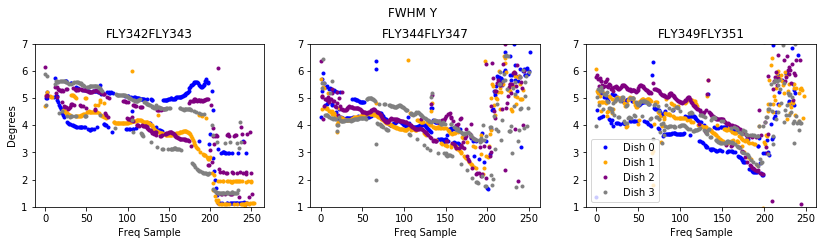

In [39]:
#Have to go back through this-- when I originally fit to flights 344+347, fits were WAAAY cleaner... 
#ref nb 6 for old plots

colorlist = ['blue', 'orange', 'purple', 'gray']

counter = 1
fig = plt.figure(figsize = (14,3))

for key in concatFits.keys():
    ax = fig.add_subplot(1,3,counter)
    for dish in range(4):
        fwhmx = []
        for i in range(len(concatFits[key][dish])):
            try: fwhmx.append(sigma_tofwhm(concatFits[key][dish][i][0][3]))
            except: pass 
        ax.plot(range(len(fwhmx)), fwhmx,'.', label ='Dish '+str(dish), color = colorlist[dish])

#         if i != 1: 
#             ax.plot(range(len(fwhmx)), fwhmx,'.', color = colorlist[dish])

    ax.set_ylim(1,7)
    ax.set_xlabel('Freq Sample')
    if counter == 1: ax.set_ylabel('Degrees')
    ax.set_title(key)
    counter +=1
ax.legend()

plt.suptitle('FWHM X', y=1.05)
plt.show()

colorlist = ['blue', 'orange', 'purple', 'gray']

counter = 1
fig = plt.figure(figsize = (14,3))

for key in concatFits.keys():
    ax = fig.add_subplot(1,3,counter)
    for dish in range(4):
        fwhmx = []
        for i in range(len(concatFits[key][dish])):
            try: fwhmx.append(sigma_tofwhm(concatFits[key][dish][i][0][4]))
            except: pass 
        ax.plot(range(len(fwhmx)), fwhmx,'.', label ='Dish '+str(dish), color = colorlist[dish])

#         if i != 1: 
#             ax.plot(range(len(fwhmx)), fwhmx,'.', color = colorlist[dish])

    ax.set_ylim(1,7)
    ax.set_xlabel('Freq Sample')
    if counter == 1: ax.set_ylabel('Degrees')
    ax.set_title(key)
    counter +=1
ax.legend()

plt.suptitle('FWHM Y', y=1.05)



Text(0.5, 1.02, 'Background level from fits for Thurs Flights')

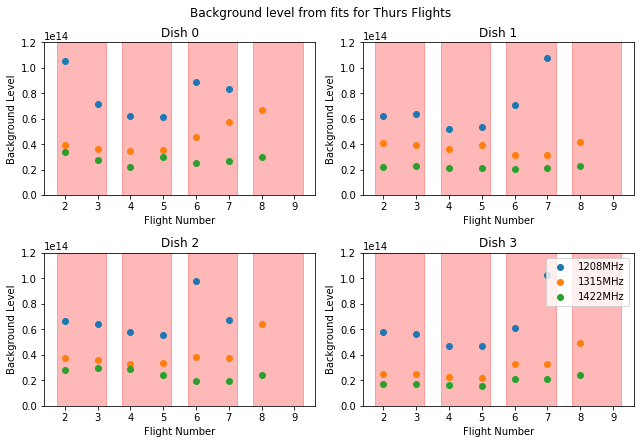

In [40]:
#flights banded together are same atten level, pol
counter = 1
fig = plt.figure(figsize = (9,6))
for dish in range(4):
    ax = fig.add_subplot(2,2,counter)
    for freq in [50, 100, 150]:
        ax.axvspan(1.75, 3.25, alpha=0.1, color='red')
        ax.axvspan(3.75, 5.25, alpha=0.1, color='red')
        ax.axvspan(5.75, 7.25, alpha=0.1, color='red')
        ax.axvspan(7.75, 9.25, alpha=0.1, color='red')
        backgrounds = [gauss_fits[key][dish][freq][0][-1] for key in gauss_fits.keys()]
        ax.plot(np.arange(2,9), backgrounds, 'o', label = str(round(getfreq(freq)))+'MHz')
        ax.set_ylim(0,1.2e14)
        ax.set_xlabel('Flight Number')
        ax.set_ylabel('Background Level')
        ax.set_title('Dish '+str(dish))
    counter +=1

# plt.plot(np.arange(2,10), backgrounds50, 'o', label = '1200MHz')
# plt.plot(np.arange(2,10), backgrounds150, 'o', label = '1420MHz')
ax.legend(loc = 'upper right')
plt.tight_layout()
plt.suptitle('Background level from fits for Thurs Flights', y = 1.02)

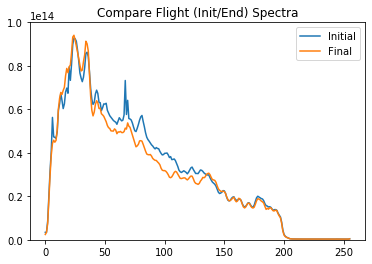

In [41]:
plt.plot(thurs_offsets['FLY343'].fulldict['autos'][0,0,:], label = 'Initial')
plt.plot(thurs_offsets['FLY343'].fulldict['autos'][0,len(thurs_offsets['FLY343'].fulldict['autos'][0,:,0])-1,:], label = 'Final')
plt.ylim(0,1e14)
plt.title('Compare Flight (Init/End) Spectra')
plt.legend()

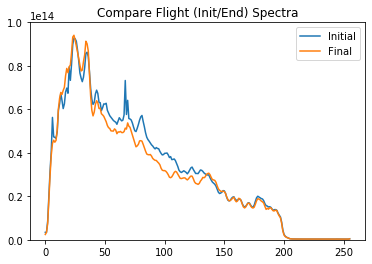

In [42]:
plt.plot(thurs_offsets['FLY343'].fulldict['autos'][0,0,:], label = 'Initial')
plt.plot(thurs_offsets['FLY343'].fulldict['autos'][0,len(thurs_offsets['FLY343'].fulldict['autos'][0,:,0])-1,:], label = 'Final')
plt.ylim(0,1e14)
plt.title('Compare Flight (Init/End) Spectra')
plt.legend()

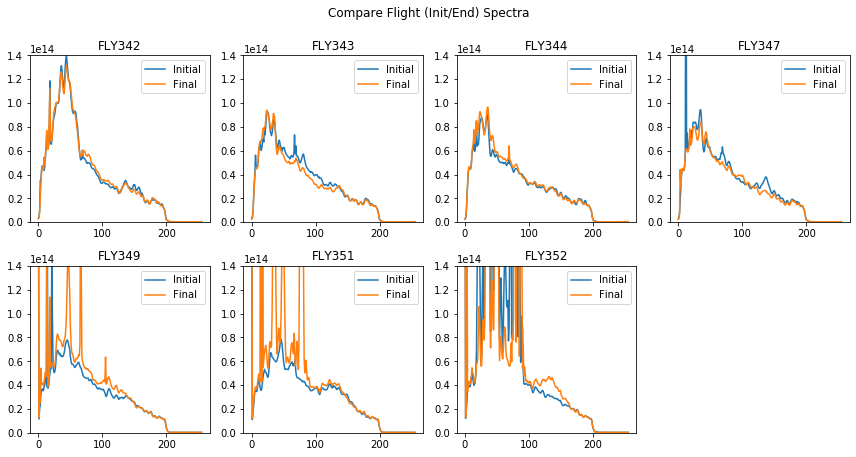

In [43]:
fig = plt.figure(figsize = (12,6))
counter = 1
for i in thurs_raw.keys():
    ax = fig.add_subplot(2,4,counter)
    ax.plot(thurs_offsets[i].fulldict['autos'][0,0,:], label = 'Initial')
    ax.plot(thurs_offsets[i].fulldict['autos'][0,len(thurs_offsets[i].fulldict['autos'][0,:,0])-1,:], label = 'Final')
    ax.set_ylim(0,1.4e14)
    ax.set_title(i)
    counter +=1
    ax.legend()
plt.suptitle('Compare Flight (Init/End) Spectra', y=1.05)
plt.tight_layout()